### 红酒分类模型

#### 1.导入相关的库

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

#### 2.探索数据

In [2]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### 3.分训练集和测试集

In [8]:
Xtrain,Xtest,ytrain,ytest = train_test_split(wine.data,wine.target,test_size=0.3)
Xtrain.shape

(124, 13)

In [9]:
Xtest.shape

(54, 13)

#### 4.建立模型

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest)
score  # score默认为accuracy即精确度

0.8703703703703703

#### 5.画出一棵树

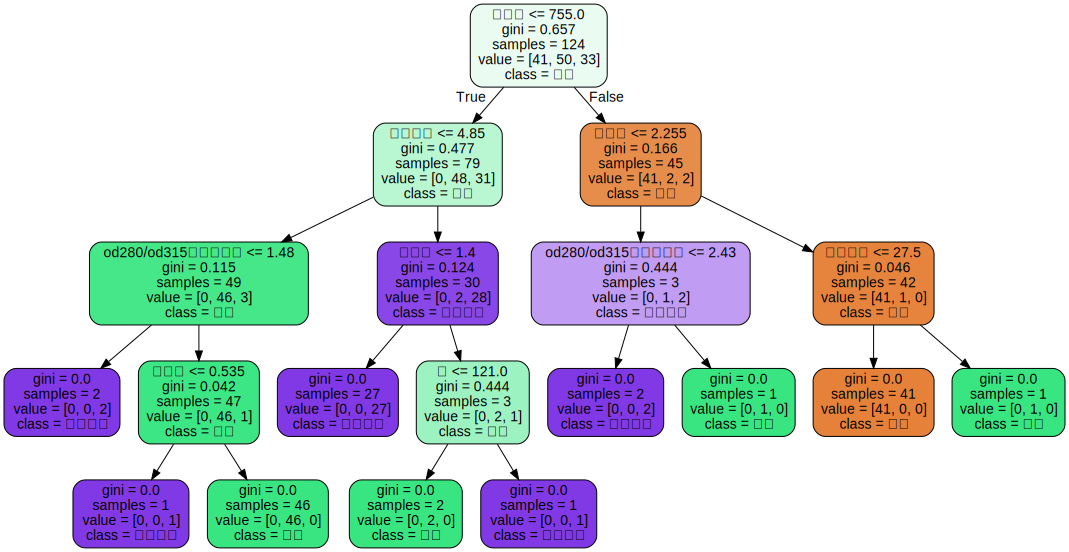

In [11]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf  # 已经训练好的模型
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

#### 6.探索决策树

**各个参数的重要性**

In [12]:
clf.feature_importances_  

array([0.        , 0.        , 0.        , 0.02395559, 0.01635992,
       0.        , 0.10476563, 0.        , 0.        , 0.34729938,
       0.        , 0.06145447, 0.446165  ])

In [13]:
data = pd.DataFrame(clf.feature_importances_
                    ,index=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
                    ,columns=['各个的参数重要性']
                   )
data

,各个的参数重要性
酒精,0.000000
苹果酸,0.000000
灰,0.000000
灰的碱性,0.023956
镁,0.016360
总酚,0.000000
类黄酮,0.104766
非黄烷类酚类,0.000000
花青素,0.000000
颜色强度,0.347299


**zip()函数将可迭代值一一配对返回生成元组的列表**

In [14]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.023955594507741734),
 ('镁', 0.016359918200408996),
 ('总酚', 0.0),
 ('类黄酮', 0.10476563422654016),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.3472993825937613),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.06145447344843169),
 ('脯氨酸', 0.4461649970231162)]

### 参数调优

#### 1.随机参数

**random_state**，用来设置分支中随机参数的模式，在高维度时随机性会表现得更加明显

In [15]:
clf = tree.DecisionTreeClassifier(random_state=30)
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest)
score

0.9074074074074074

**splitter**，有两种参数**best**和**random**，即选择更重要的特征进行分支，还是随机用随机特征进行分支,选择random参数能有效的防止过拟合现象

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='best')
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest)
score

0.9074074074074074

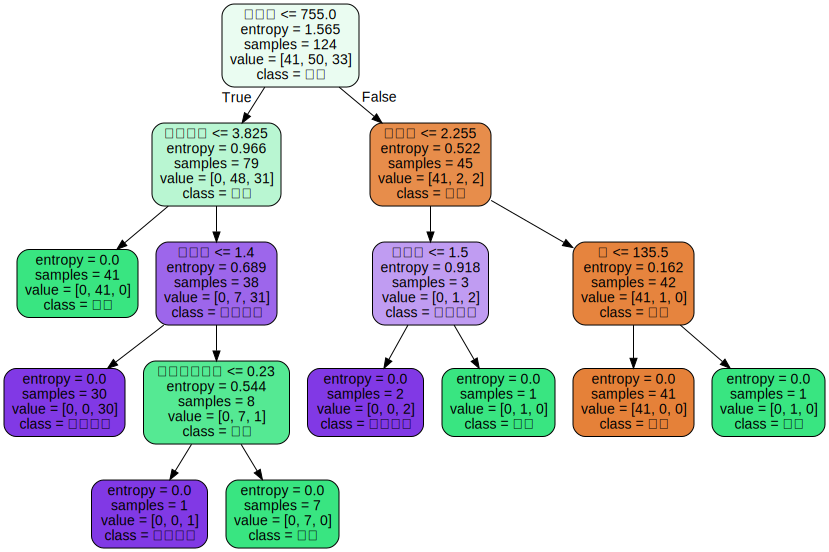

In [17]:
import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=['琴酒','雪莉','贝尔摩德']
                               ,filled=True
                               ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

#### 2.剪枝参数

* **max_depth**,限制树的最大深度，超过设定深度的树枝全部剪掉

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='best'
                                 ,max_depth=3)
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest)
score

0.9259259259259259

* **min_samples_leaf**，设置子节点最小包含样本数，类别较多的样本建议从=5开始，类别不多的样本默认为1即可
* **min_samples_split**，设置一个节点要分裂所包含的最小样本数

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=30
                                 ,splitter='best'
                                 ,max_depth=3
                                 ,min_samples_leaf=1
                                 ,min_samples_split=15)
clf = clf.fit(Xtrain,ytrain)
score = clf.score(Xtest,ytest)
score

0.9259259259259259

* **min_features**限制分枝时考虑的特征个数，超过限制个数的特征值都会被舍弃，强制设定这个参数会导致模型学习不足，建议使用PCA,ICA或者特征选择模块中的降维算法

* **min_impurity_decrease**限制信息增益的大小，信息增益小于设定数值的分枝不会发生

#### 3.通过超参数曲线确定最优的剪枝参数

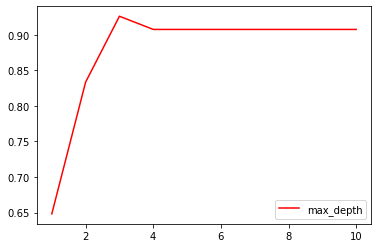

In [20]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion='entropy'
                                     ,random_state=30
                                     ,splitter='best'
                                     )
    clf = clf.fit(Xtrain,ytrain)
    score = clf.score(Xtest,ytest)
    test.append(score)
plt.plot(range(1,11),test,color='red',label='max_depth')
plt.legend()
plt.show()

#### 4.目标权重参数

* **class_weight**

  对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模，参数默认为None，表示自动给与数据集中的所有标签相同的权重

* **min_weight_fraction_leaf**
    有了权重之后，样本量就不再是单纯的记录数目，而是受输入的权重影响，因此这时候剪枝，需要搭配min_weight_fraction_leaf基于权重的减值参数来使用

#### 5.重要属性和接口

In [21]:
clf.apply(Xtest)  # apply返回每个测试样本所在的叶子节点的索引

array([ 2,  7, 13, 10,  7, 13,  2, 13,  4, 13,  2,  4,  4, 13,  4,  2,  2,
        4, 13,  2,  4, 10,  4,  6,  2,  2, 13, 14, 13, 13,  4,  2,  4, 10,
        2, 13, 13, 13, 13,  4, 10, 10,  2, 10, 13,  4,  2,  7, 13,  2,  7,
        7,  2,  2], dtype=int64)

In [22]:
clf.predict(Xtest)  # 返回每个测试样本的分类

array([1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2,
       2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1])